In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def visualize_json_grid(json_path: str, cmap: str = "gray"):
    # 1) JSON 로드
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    print(f"[+] Loaded {len(data)} cells from JSON")

    # 2) "(x, y)" -> 정수 좌표 변환
    xs, ys, vals = [], [], []

    for k, v in data.items():
        k_clean = k.strip("()")
        x_str, y_str = k_clean.split(",")
        xs.append(int(x_str))
        ys.append(int(y_str))
        vals.append(v)

    xs = np.array(xs)
    ys = np.array(ys)
    vals = np.array(vals, dtype=float)

    # 3) 좌표 shift (min을 0으로)
    x_min, y_min = xs.min(), ys.min()
    xs_shift = xs - x_min
    ys_shift = ys - y_min

    nx = xs_shift.max() + 1
    ny = ys_shift.max() + 1
    print("grid size (ny, nx):", ny, nx)

    # 4) 2D grid 생성
    grid = np.zeros((ny, nx), dtype=float)
    for x_s, y_s, v in zip(xs_shift, ys_shift, vals):
        grid[y_s, x_s] = v  # (행, 열) = (y, x)

    # 5) 시각화 (타이틀 없이)
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, origin="lower", cmap=cmap)
    plt.colorbar(label="value")
    plt.xlabel("x (shifted)")
    plt.ylabel("y (shifted)")
    plt.grid(False)
    plt.show()

    return grid

In [3]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline   # 노트북이면 한 번만 실행해두면 됨

def visualize_pcd(pcd_path: str,
                  max_points: int = 200_000,
                  use_rgb_if_available: bool = True,
                  show_3d: bool = False):

    # 1) PCD 로드
    pcd = o3d.io.read_point_cloud(pcd_path)

    if pcd.is_empty():
        raise RuntimeError(f"[!] Failed to load or empty PCD: {pcd_path}")

    pts = np.asarray(pcd.points)  # (N, 3)
    N = pts.shape[0]
    print(f"[+] Loaded point cloud: {N} points")

    # 2) 색 정보 처리
    if use_rgb_if_available and pcd.has_colors():
        colors = np.asarray(pcd.colors)  # (N, 3), 0~1
        print("[+] Color information found in PCD (using RGB).")
    else:
        print("[!] No usable color information. Using gray.")
        colors = np.tile([[0.5, 0.5, 0.5]], (N, 1))  # 회색

    # 3) 샘플링 (옵션)
    if N > max_points:
        idx = np.random.choice(N, max_points, replace=False)
        pts_vis = pts[idx]
        colors_vis = colors[idx]
        print(f"    → subsampled from {N} to {pts_vis.shape[0]} points for plotting")
    else:
        pts_vis = pts
        colors_vis = colors

    # 4) Top-down (XY) 시각화
    x = pts_vis[:, 0]
    y = pts_vis[:, 1]

    print(f"X range: {x.min():.3f} → {x.max():.3f}")
    print(f"Y range: {y.min():.3f} → {y.max():.3f}")

    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, c=colors_vis, s=1)
    plt.axis("equal")
    plt.xlabel("X")
    plt.ylabel("Y")
    # 타이틀 없음 (요청 스타일에 맞춰)
    plt.grid(False)
    plt.show()

    # 5) 3D 시각화 (옵션)
    if show_3d:
        from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(pts_vis[:, 0], pts_vis[:, 1], pts_vis[:, 2],
                   c=colors_vis, s=1)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        # 타이틀 없음
        plt.show()

    return pts_vis, colors_vis


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


[+] Loaded 1006 cells from JSON
grid size (ny, nx): 47 54


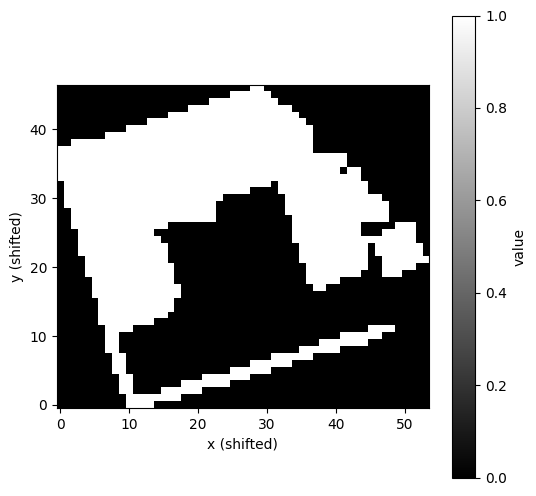

[+] Loaded point cloud: 391810 points
[+] Color information found in PCD (using RGB).
    → subsampled from 391810 to 200000 points for plotting
X range: -76.010 → 153.435
Y range: -122.914 → 56.698


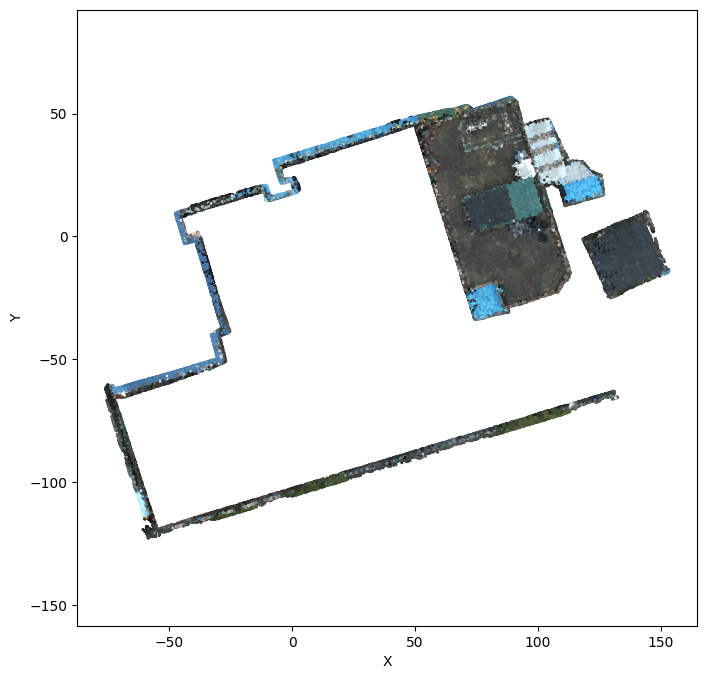

In [4]:
installable = visualize_json_grid(json_path="/workspace/MAPS/sejong/installable_map/installable_grid.json")
pts_vis, colors_vis = visualize_pcd(
    "/workspace/MAPS/sejong/installable_map/installable_map.pcd",
    max_points=200_000,
    use_rgb_if_available=True,
    show_3d=False
)


[+] Loaded 1132 cells from JSON
grid size (ny, nx): 41 60


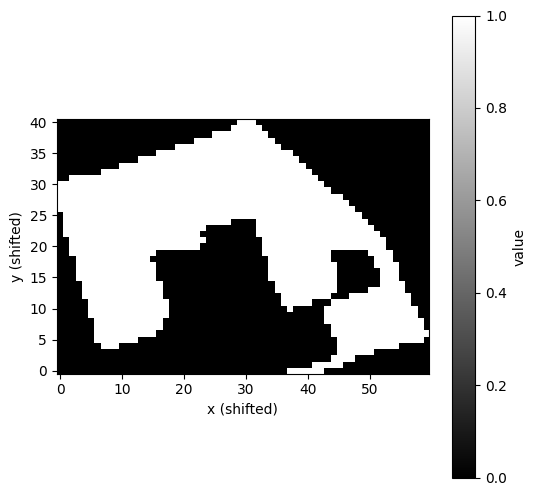

[+] Loaded point cloud: 1208279 points
[+] Color information found in PCD (using RGB).
    → subsampled from 1208279 to 200000 points for plotting
X range: -111.397 → 183.965
Y range: -87.535 → 113.626


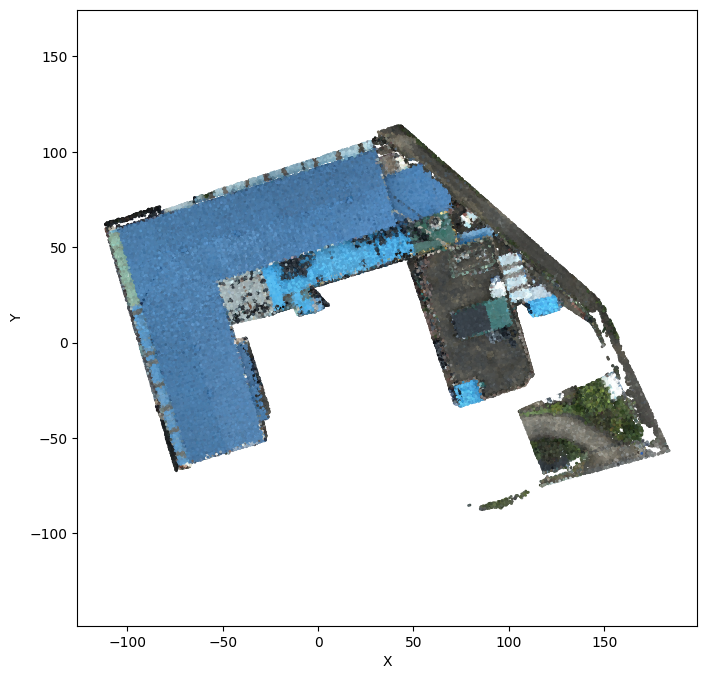

In [7]:
ignore = visualize_json_grid(json_path="/workspace/MAPS/sejong/ignore_map/ignore_grid.json")
pts_vis, colors_vis = visualize_pcd(
    "/workspace/MAPS/sejong/ignore_map/ignore_map.pcd",
    max_points=200_000,
    use_rgb_if_available=True,
    show_3d=False
)

[+] Loaded point cloud: 2128549 points
[+] Color information found in PCD (using RGB).
    → subsampled from 2128549 to 200000 points for plotting
X range: -111.397 → 183.513
Y range: -122.686 → 113.674


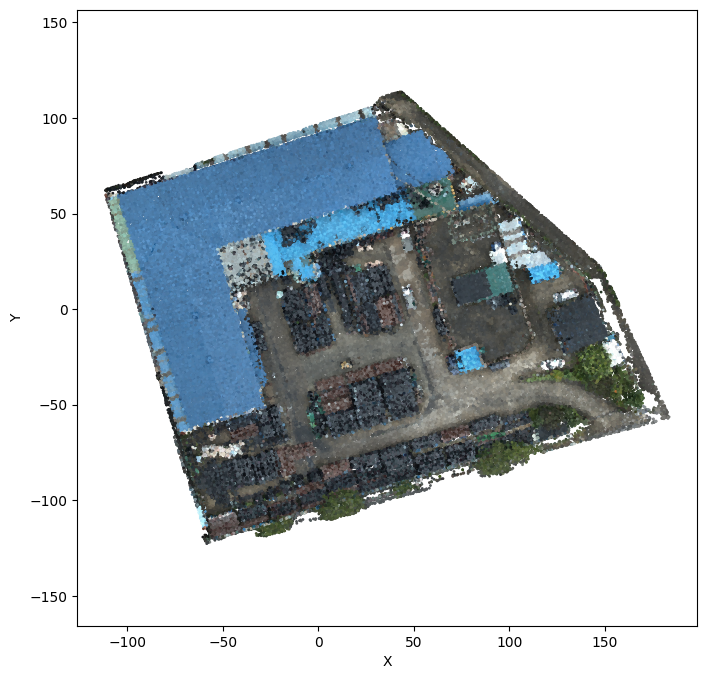

In [8]:
pts_vis, colors_vis = visualize_pcd(
    "/workspace/PCD_FILES/sejong.pcd",
    max_points=200_000,
    use_rgb_if_available=True,
    show_3d=False
)